# Lab | Random variable distributions

## Instructions

    Get the numerical variables from our dataset.
    Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.
    Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
numericals = data.select_dtypes(np.number)
numericals.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


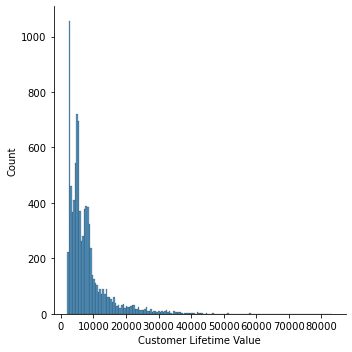

In [5]:
sns.displot(x=numericals['Customer Lifetime Value']);

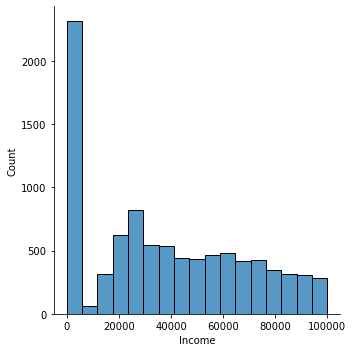

In [6]:
sns.displot(x=numericals['Income']);

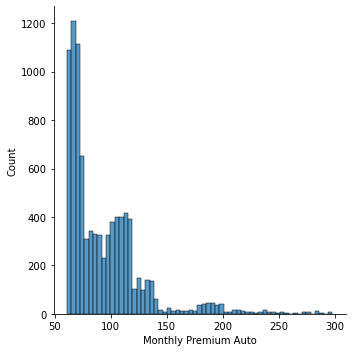

In [7]:
sns.displot(x=numericals['Monthly Premium Auto']);

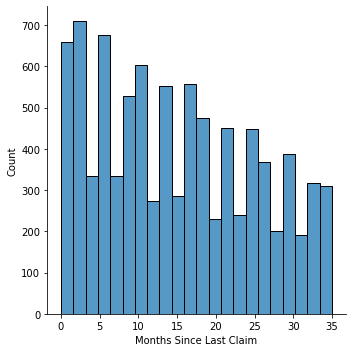

In [8]:
sns.displot(x=numericals['Months Since Last Claim']);

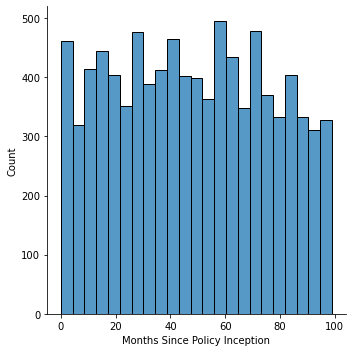

In [9]:
sns.displot(x=numericals['Months Since Policy Inception']);

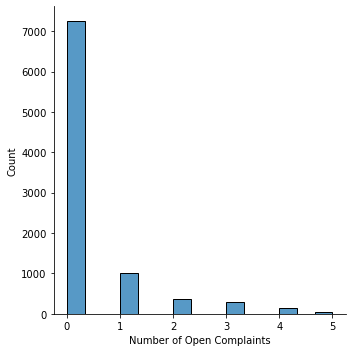

In [10]:
sns.displot(x=numericals['Number of Open Complaints']);

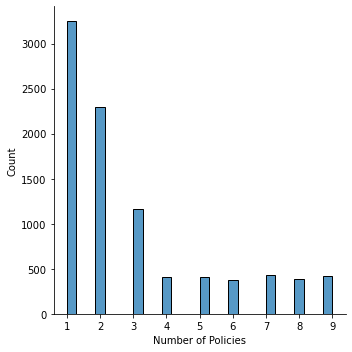

In [11]:
sns.displot(x=numericals['Number of Policies']);

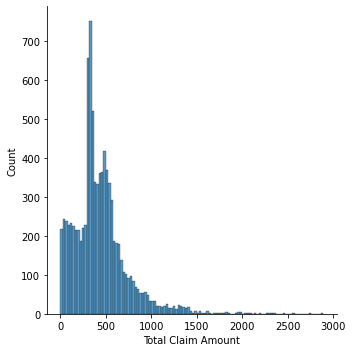

In [12]:
sns.displot(x=numericals['Total Claim Amount']);

In [13]:
# scaling numericals and see the plot results
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(numericals)
scaled = scaler.transform(numericals)
scaled_df = pd.DataFrame(scaled, columns=numericals.columns)
scaled_df.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.42225,-0.822648,-0.169640
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.42225,2.106160,2.400737
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.42225,-0.404247,0.455734
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.42225,1.687759,0.329769
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.42225,-0.822648,-1.018843


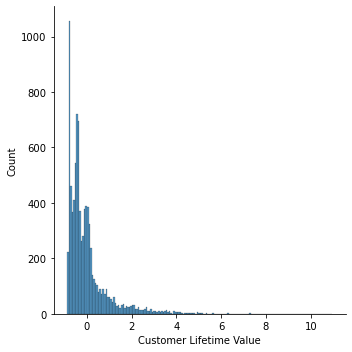

In [14]:
sns.displot(x=scaled_df['Customer Lifetime Value']);

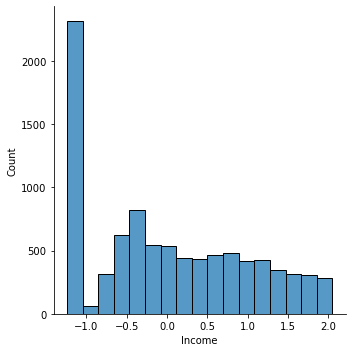

In [15]:
sns.displot(x=scaled_df['Income']);

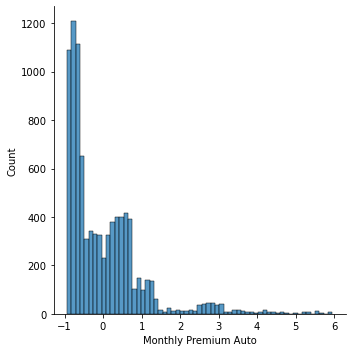

In [16]:
sns.displot(x=scaled_df['Monthly Premium Auto']);

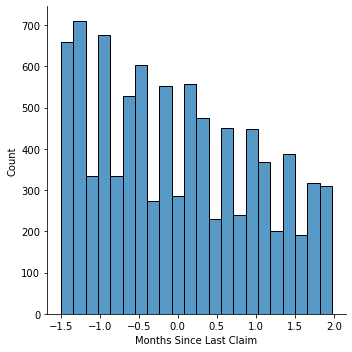

In [17]:
sns.displot(x=scaled_df['Months Since Last Claim']);

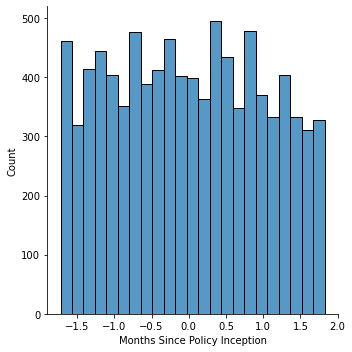

In [18]:
sns.displot(x=scaled_df['Months Since Policy Inception']);

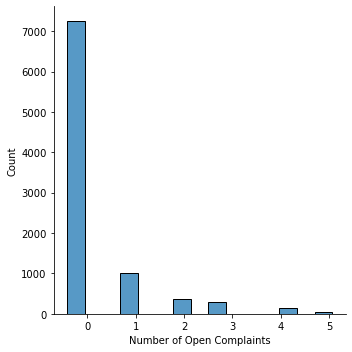

In [19]:
sns.displot(x=scaled_df['Number of Open Complaints']);

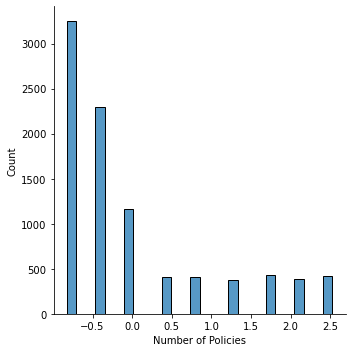

In [20]:
sns.displot(x=scaled_df['Number of Policies']);

In [21]:
# logarithmic transformation
def log_transform(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN # We are returning NaNs so that we can replace them with means later

C:\Users\TEMEL\AppData\Local\Temp/ipykernel_34532/1709601901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericals[i] = list(map(log_transform, numericals[i]))
C:\Users\TEMEL\AppData\Local\Temp/ipykernel_34532/1709601901.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericals[i] = numericals[i].fillna(np.mean(numericals[i]))


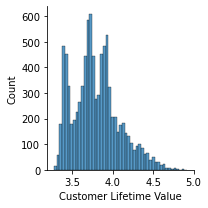

C:\Users\TEMEL\AppData\Local\Temp/ipykernel_34532/773040406.py:3: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(x)
C:\Users\TEMEL\AppData\Local\Temp/ipykernel_34532/1709601901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericals[i] = list(map(log_transform, numericals[i]))
C:\Users\TEMEL\AppData\Local\Temp/ipykernel_34532/1709601901.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericals[i] = numericals[i].fillna(np.mean(numericals[i]))


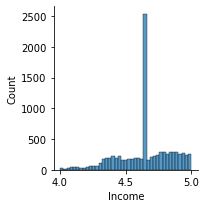

C:\Users\TEMEL\AppData\Local\Temp/ipykernel_34532/1709601901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericals[i] = list(map(log_transform, numericals[i]))
C:\Users\TEMEL\AppData\Local\Temp/ipykernel_34532/1709601901.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericals[i] = numericals[i].fillna(np.mean(numericals[i]))


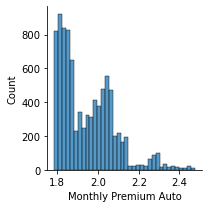

C:\Users\TEMEL\AppData\Local\Temp/ipykernel_34532/773040406.py:3: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(x)
C:\Users\TEMEL\AppData\Local\Temp/ipykernel_34532/1709601901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericals[i] = list(map(log_transform, numericals[i]))
C:\Users\TEMEL\AppData\Local\Temp/ipykernel_34532/1709601901.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericals[i] = numericals[i].fillna(np.mean(numericals[i]))


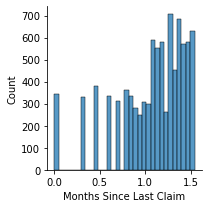

C:\Users\TEMEL\AppData\Local\Temp/ipykernel_34532/773040406.py:3: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(x)
C:\Users\TEMEL\AppData\Local\Temp/ipykernel_34532/1709601901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericals[i] = list(map(log_transform, numericals[i]))
C:\Users\TEMEL\AppData\Local\Temp/ipykernel_34532/1709601901.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericals[i] = numericals[i].fillna(np.mean(numericals[i]))


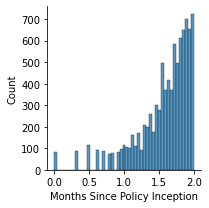

C:\Users\TEMEL\AppData\Local\Temp/ipykernel_34532/773040406.py:3: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(x)
C:\Users\TEMEL\AppData\Local\Temp/ipykernel_34532/1709601901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericals[i] = list(map(log_transform, numericals[i]))
C:\Users\TEMEL\AppData\Local\Temp/ipykernel_34532/1709601901.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericals[i] = numericals[i].fillna(np.mean(numericals[i]))


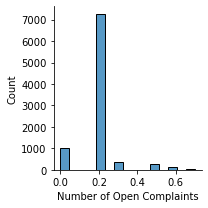

C:\Users\TEMEL\AppData\Local\Temp/ipykernel_34532/1709601901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericals[i] = list(map(log_transform, numericals[i]))
C:\Users\TEMEL\AppData\Local\Temp/ipykernel_34532/1709601901.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericals[i] = numericals[i].fillna(np.mean(numericals[i]))


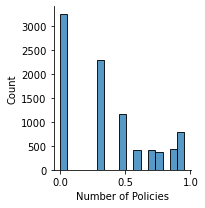

C:\Users\TEMEL\AppData\Local\Temp/ipykernel_34532/1709601901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericals[i] = list(map(log_transform, numericals[i]))
C:\Users\TEMEL\AppData\Local\Temp/ipykernel_34532/1709601901.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericals[i] = numericals[i].fillna(np.mean(numericals[i]))


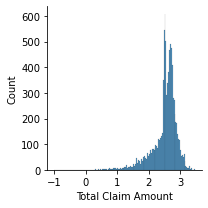

In [23]:
for i in numericals.columns:
    numericals[i] = list(map(log_transform, numericals[i]))
    # Now we replace the NAN by the mean
    numericals[i] = numericals[i].fillna(np.mean(numericals[i]))
    sns.displot(numericals[i], height = 3)
    plt.show()